In [3]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd
import sys
import numpy as np
from numpy import random
import matplotlib

%matplotlib inline

In [4]:
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [5]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [6]:
df.to_csv('births1880.csv', index=False, header=False)

In [7]:
Location = r'/Users/Claude/Numerical-Analysis/births1880.csv'
df = pd.read_csv(Location)
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


In [8]:
df = pd.read_csv(Location, header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [9]:
df = pd.read_csv(Location, names=['Names','Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [10]:
import os
os.remove(Location)

In [11]:
df.dtypes

Names     object
Births     int64
dtype: object

In [12]:
df.Births.dtype

dtype('int64')

In [13]:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Names,Births
4,Mel,973


The most popular name


,Names,Births
4,Mel,973


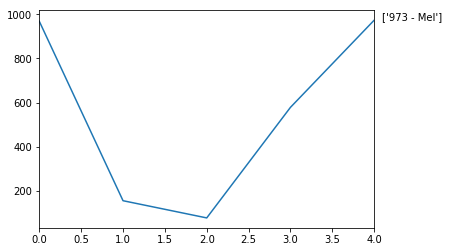

In [14]:
# Create graph
df['Births'].plot()

# Maximum value in the data set
MaxValue = df['Births'].max()

# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("The most popular name")
df[df['Births'] == df['Births'].max()]
#Sorted.head(1) can also be used

In [15]:
# From dict of Series or dicts
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [16]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [17]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [18]:
# From dict of ndarrays / lists
# The ndarrays must all be the same length
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}

pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [19]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [20]:
# From structured or record array
data = np.zeros((2,), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])
data[:] = [(1, 2., 'Hello'), (2, 3., "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,Hello
1,2,3.0,World


In [21]:
pd.DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2.0,Hello
second,2,3.0,World


In [22]:
pd.DataFrame(data, columns=['C', 'A', 'B'])

,C,A,B
0,Hello,1,2.0
1,World,2,3.0


In [23]:
# From a dict of tuples
# multi-incexed frame
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
              ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
              ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
              ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
              ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [24]:
data

array([(1,  2., 'Hello'), (2,  3., 'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [25]:
# Using DataFrame.from_records
pd.DataFrame.from_records(data, index='C')

,A,B
C,,
Hello,1,2.0
World,2,3.0


In [26]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [27]:
df['three'] = df['one'] * df['two']

In [28]:
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2882: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
print('Python version ' + sys.version)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 2.7.11 (default, Jan 16 2016, 23:38:58) 
[GCC 4.2.1 Compatible Apple LLVM 7.0.2 (clang-700.1.81)]
Pandas version: 0.20.3
Matplotlib version 2.0.2


In [30]:
# set seed
random.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        data = random.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[random.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = [states[random.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

In [31]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [32]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [33]:
# Save results to excel
df.to_excel('Lesson3.xlsx', index=False)
print('Done')

Done


In [34]:
pd.read_excel?

In [35]:
# Location of file
Location = r'/Users/Claude/Numerical-Analysis/Lesson3.xlsx'

# Parse a specific sheet
df = pd.read_excel(Location, 0, index_col='StatusDate')
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [36]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26', '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23', '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19', '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17', '2012-12-24', '2012-12-31'], dtype='datetime64[ns]', name=u'StatusDate', length=836, freq=None)

In [37]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


In [38]:
df['State'].unique()

array([u'GA', u'FL', u'fl', u'TX', u'NY', u'NJ'], dtype=object)

In [39]:
# Clean State Column, convert to upper case
df['State'] = df.State.apply(lambda x: x.upper())

In [40]:
df['State'].unique()

array([u'GA', u'FL', u'TX', u'NY', u'NJ'], dtype=object)

In [41]:
# Only grab where Status == 1
mask = df['Status'] == 1
df = df[mask]

In [42]:
# Convert NJ to NY
mask = df.State == 'NJ'
df['State'][mask] = 'NY'

In [43]:
df['State'].unique()

array([u'GA', u'FL', u'NY', u'TX'], dtype=object)

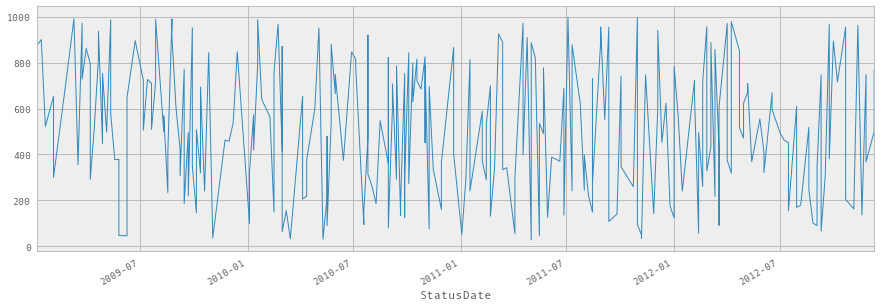

In [44]:
df['CustomerCount'].plot(figsize=(15,5));

In [45]:
sortdf = df[df['State']=='NY'].sort_index(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-19,NY,1,522
2009-02-23,NY,1,710
2009-03-09,NY,1,992
2009-03-16,NY,1,355
2009-03-23,NY,1,728
2009-03-30,NY,1,863
2009-04-13,NY,1,520
2009-04-20,NY,1,820
2009-04-20,NY,1,937


In [46]:
# Group by State and StatusDate
Daily = df.reset_index().groupby(['State','StatusDate']).sum()
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-12       1            901
      2009-02-02       1            653
      2009-03-23       1            752
      2009-04-06       2           1086
      2009-06-08       1            649

In [47]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2009-01-12            901
      2009-02-02            653
      2009-03-23            752
      2009-04-06           1086
      2009-06-08            649

In [48]:
Daily.index

MultiIndex(levels=[[u'FL', u'GA', u'NY', u'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-02-02 00:00:00, 2009-02-23 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-08 00:00:00, 2009-06-22 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-23 00:00:00, 2009-11-30 00:00:00, 2009-12-07 00:00:00, 2009-12-14 00:00:00, 2010-01-04 00:00:00, 2010-01-11 00:00:00, 2010-01-18 00:00:00, 2010-01-25 00:00:00, 2010-02-08 00:00:00, 2010-

In [49]:
# Select the State index
Daily.index.levels[0]

Index([u'FL', u'GA', u'NY', u'TX'], dtype='object', name=u'State')

In [50]:
# Select the StatusDate index
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-02-02', '2009-02-23', '2009-03-09', '2009-03-16', '2009-03-23', '2009-03-30', '2009-04-06',
               ...
               '2012-09-24', '2012-10-01', '2012-10-08', '2012-10-22', '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19', '2012-11-26', '2012-12-10'], dtype='datetime64[ns]', name=u'StatusDate', length=161, freq=None)

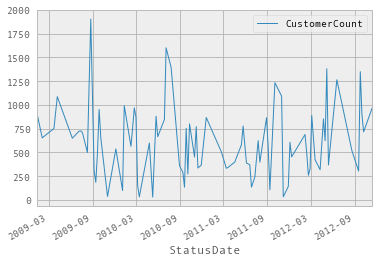

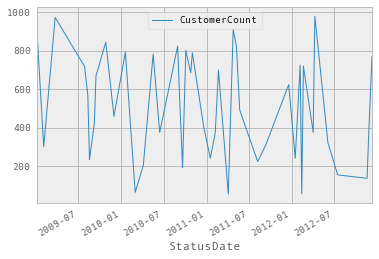

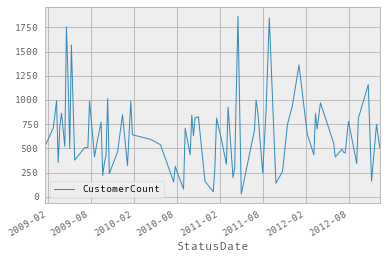

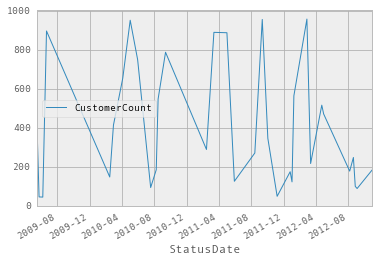

In [51]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot()

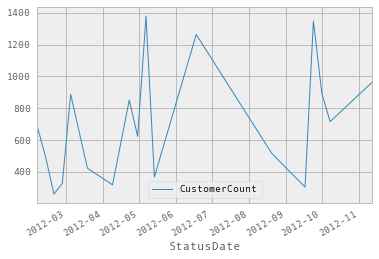

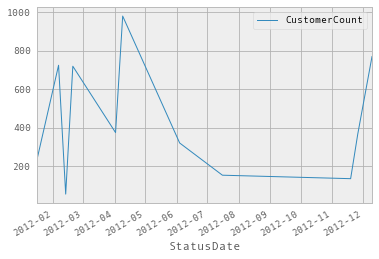

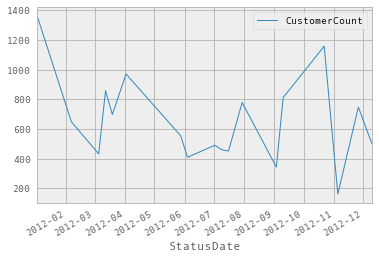

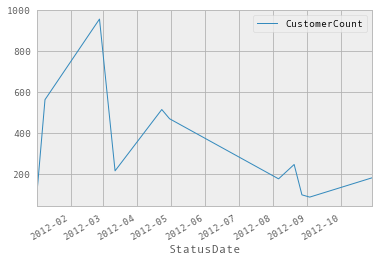

In [52]:
Daily.loc['FL']['2012':].plot()
Daily.loc['GA']['2012':].plot()
Daily.loc['NY']['2012':].plot()
Daily.loc['TX']['2012':].plot()

In [53]:
# Combine all markets

# Get the max customer count by Date
ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustomerCount'] # rename column
#print ALL

# Group by Year and Month
# if 'by' parameter is a function, the dataframe's index is used to determine the groups.
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month]) 
#print YearMonth.head()

# What is the max customer count per Year and Month
ALL['Max'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

,CustomerCount,Max
StatusDate,,
2009-01-05,877,901
2009-01-12,901,901
2009-01-19,522,901
2009-02-02,953,953
2009-02-23,710,953


In [54]:
pd.date_range?

In [55]:
# Create the BHAG dataframe
data = [1000,2000,3000]
idx = pd.date_range(start='12/31/2011', end='12/31/2013', freq='A')
BHAG = pd.DataFrame(data, index=idx, columns=['BHAG'])
BHAG

,BHAG
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


In [57]:
np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[0, 2] = np.nan

df.style

,A,B,C,D,E
0,1,1.32921,nan,-0.31628,-0.99081
1,2,-1.07082,-1.43871,0.564417,0.295722
2,3,-1.6264,0.219565,0.678805,1.88927
3,4,0.961538,0.104011,-0.481165,0.850229
4,5,1.45342,1.05774,0.165562,0.515018
5,6,-1.33694,0.562861,1.39285,-0.063328
6,7,0.121668,1.2076,-0.00204021,1.6278
7,8,0.354493,1.03753,-0.385684,0.519818
8,9,1.68658,-1.32596,1.42898,-2.08935
9,10,-0.12982,0.631523,-0.586538,0.29072


In [58]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

s = df.style.applymap(color_negative_red)
s

,A,B,C,D,E
0,1,1.32921,nan,-0.31628,-0.99081
1,2,-1.07082,-1.43871,0.564417,0.295722
2,3,-1.6264,0.219565,0.678805,1.88927
3,4,0.961538,0.104011,-0.481165,0.850229
4,5,1.45342,1.05774,0.165562,0.515018
5,6,-1.33694,0.562861,1.39285,-0.063328
6,7,0.121668,1.2076,-0.00204021,1.6278
7,8,0.354493,1.03753,-0.385684,0.519818
8,9,1.68658,-1.32596,1.42898,-2.08935
9,10,-0.12982,0.631523,-0.586538,0.29072


In [59]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style.apply(highlight_max)

,A,B,C,D,E
0,1,1.32921,nan,-0.31628,-0.99081
1,2,-1.07082,-1.43871,0.564417,0.295722
2,3,-1.6264,0.219565,0.678805,1.88927
3,4,0.961538,0.104011,-0.481165,0.850229
4,5,1.45342,1.05774,0.165562,0.515018
5,6,-1.33694,0.562861,1.39285,-0.063328
6,7,0.121668,1.2076,-0.00204021,1.6278
7,8,0.354493,1.03753,-0.385684,0.519818
8,9,1.68658,-1.32596,1.42898,-2.08935
9,10,-0.12982,0.631523,-0.586538,0.29072


In [63]:
df.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,A,B,C,D,E
0,1,1.32921,nan,-0.31628,-0.99081
1,2,-1.07082,-1.43871,0.564417,0.295722
2,3,-1.6264,0.219565,0.678805,1.88927
3,4,0.961538,0.104011,-0.481165,0.850229
4,5,1.45342,1.05774,0.165562,0.515018
5,6,-1.33694,0.562861,1.39285,-0.063328
6,7,0.121668,1.2076,-0.00204021,1.6278
7,8,0.354493,1.03753,-0.385684,0.519818
8,9,1.68658,-1.32596,1.42898,-2.08935
9,10,-0.12982,0.631523,-0.586538,0.29072


In [61]:
df.style.format("{:.2%}")

,A,B,C,D,E
0,100.00%,132.92%,nan%,-31.63%,-99.08%
1,200.00%,-107.08%,-143.87%,56.44%,29.57%
2,300.00%,-162.64%,21.96%,67.88%,188.93%
3,400.00%,96.15%,10.40%,-48.12%,85.02%
4,500.00%,145.34%,105.77%,16.56%,51.50%
5,600.00%,-133.69%,56.29%,139.29%,-6.33%
6,700.00%,12.17%,120.76%,-0.20%,162.78%
7,800.00%,35.45%,103.75%,-38.57%,51.98%
8,900.00%,168.66%,-132.60%,142.90%,-208.94%
9,1000.00%,-12.98%,63.15%,-58.65%,29.07%


In [70]:
#reload(sys)
sys.setdefaultencoding('utf-8')
df.style.format({"B": lambda x: "±{:.2f}".format(abs(x))})

,A,B,C,D,E
0,1,±1.33,nan,-0.31628,-0.99081
1,2,±1.07,-1.43871,0.564417,0.295722
2,3,±1.63,0.219565,0.678805,1.88927
3,4,±0.96,0.104011,-0.481165,0.850229
4,5,±1.45,1.05774,0.165562,0.515018
5,6,±1.34,0.562861,1.39285,-0.063328
6,7,±0.12,1.2076,-0.00204021,1.6278
7,8,±0.35,1.03753,-0.385684,0.519818
8,9,±1.69,-1.32596,1.42898,-2.08935
9,10,±0.13,0.631523,-0.586538,0.29072


In [71]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

s = df.style.background_gradient(cmap=cm)
s

,A,B,C,D,E
0,1,1.32921,nan,-0.31628,-0.99081
1,2,-1.07082,-1.43871,0.564417,0.295722
2,3,-1.6264,0.219565,0.678805,1.88927
3,4,0.961538,0.104011,-0.481165,0.850229
4,5,1.45342,1.05774,0.165562,0.515018
5,6,-1.33694,0.562861,1.39285,-0.063328
6,7,0.121668,1.2076,-0.00204021,1.6278
7,8,0.354493,1.03753,-0.385684,0.519818
8,9,1.68658,-1.32596,1.42898,-2.08935
9,10,-0.12982,0.631523,-0.586538,0.29072


In [72]:
df.style.bar(subset=['A', 'B'], color='#d65f5f')

,A,B,C,D,E
0,1,1.32921,nan,-0.31628,-0.99081
1,2,-1.07082,-1.43871,0.564417,0.295722
2,3,-1.6264,0.219565,0.678805,1.88927
3,4,0.961538,0.104011,-0.481165,0.850229
4,5,1.45342,1.05774,0.165562,0.515018
5,6,-1.33694,0.562861,1.39285,-0.063328
6,7,0.121668,1.2076,-0.00204021,1.6278
7,8,0.354493,1.03753,-0.385684,0.519818
8,9,1.68658,-1.32596,1.42898,-2.08935
9,10,-0.12982,0.631523,-0.586538,0.29072


In [73]:
df.style.bar(subset=['A', 'B'], align='mid', color=['#d65f5f', '#5fba7d'])

,A,B,C,D,E
0,1,1.32921,nan,-0.31628,-0.99081
1,2,-1.07082,-1.43871,0.564417,0.295722
2,3,-1.6264,0.219565,0.678805,1.88927
3,4,0.961538,0.104011,-0.481165,0.850229
4,5,1.45342,1.05774,0.165562,0.515018
5,6,-1.33694,0.562861,1.39285,-0.063328
6,7,0.121668,1.2076,-0.00204021,1.6278
7,8,0.354493,1.03753,-0.385684,0.519818
8,9,1.68658,-1.32596,1.42898,-2.08935
9,10,-0.12982,0.631523,-0.586538,0.29072


In [74]:
df.style.set_caption('Colormaps, with a caption.')\
    .background_gradient(cmap=cm)

,A,B,C,D,E
0,1,1.32921,nan,-0.31628,-0.99081
1,2,-1.07082,-1.43871,0.564417,0.295722
2,3,-1.6264,0.219565,0.678805,1.88927
3,4,0.961538,0.104011,-0.481165,0.850229
4,5,1.45342,1.05774,0.165562,0.515018
5,6,-1.33694,0.562861,1.39285,-0.063328
6,7,0.121668,1.2076,-0.00204021,1.6278
7,8,0.354493,1.03753,-0.385684,0.519818
8,9,1.68658,-1.32596,1.42898,-2.08935
9,10,-0.12982,0.631523,-0.586538,0.29072


In [75]:
from IPython.html import widgets
@widgets.interact
def f(h_neg=(0, 359, 1), h_pos=(0, 359), s=(0., 99.9), l=(0., 99.9)):
    return df.style.background_gradient(
        cmap=sns.palettes.diverging_palette(h_neg=h_neg, h_pos=h_pos, s=s, l=l,
                                            as_cmap=True)
    )

,A,B,C,D,E
0,1,1.32921,nan,-0.31628,-0.99081
1,2,-1.07082,-1.43871,0.564417,0.295722
2,3,-1.6264,0.219565,0.678805,1.88927
3,4,0.961538,0.104011,-0.481165,0.850229
4,5,1.45342,1.05774,0.165562,0.515018
5,6,-1.33694,0.562861,1.39285,-0.063328
6,7,0.121668,1.2076,-0.00204021,1.6278
7,8,0.354493,1.03753,-0.385684,0.519818
8,9,1.68658,-1.32596,1.42898,-2.08935
9,10,-0.12982,0.631523,-0.586538,0.29072


In [76]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "4pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

np.random.seed(25)
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
bigdf = pd.DataFrame(np.random.randn(20, 25)).cumsum()

bigdf.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '1pt'})\
    .set_caption("Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.23,1,-0.84,-0.59,-0.96,-0.22,-0.62,1.8,-2.1,0.87,-0.92,-0.23,2.2,-1.3,0.076,-1.2,1.2,-1,1.1,-0.42,2.3,-2.6,2.8,0.68,-1.6
1,-1.7,1.6,-1.1,-1.1,1,0.0037,-2.5,3.4,-1.7,1.3,-0.52,-0.015,1.5,-1.1,-1.9,-1.1,-0.68,-0.81,0.35,-0.055,1.8,-2.8,2.3,0.78,0.44
2,-0.65,3.2,-1.8,0.52,2.2,-0.37,-3,3.7,-1.9,2.5,0.21,-0.24,-0.1,-0.78,-3,-0.82,-0.21,-0.23,0.86,-0.68,1.4,-4.9,3,1.9,0.61
3,-1.6,3.7,-2.3,0.43,4.2,-0.43,-3.9,4.2,-2.1,1.1,0.12,0.6,-0.89,0.27,-3.7,-2.7,-0.31,-1.6,1.4,-1.8,0.91,-5.8,2.8,2.1,0.28
4,-3.3,4.5,-1.9,-1.7,5.2,-1,-3.8,4.7,-0.72,1.1,-0.18,0.83,-0.22,-1.1,-4.3,-2.9,-0.97,-1.8,1.5,-1.8,2.2,-6.3,3.3,2.5,2.1
5,-0.84,4.2,-1.7,-2,5.3,-0.99,-4.1,3.9,-1.1,-0.94,1.2,0.087,-1.8,-0.11,-4.5,-0.85,-2.1,-1.4,0.8,-1.6,1.5,-6.5,2.8,2.1,3.8
6,-0.74,5.4,-2.1,-1.1,4.2,-1.8,-3.2,3.8,-3.2,-1.2,0.34,0.57,-1.8,0.54,-4.4,-1.8,-4,-2.6,-0.2,-4.7,1.9,-8.5,3.3,2.5,5.8
7,-0.44,4.7,-2.3,-0.21,5.9,-2.6,-1.8,5.5,-4.5,-3.2,-1.7,0.18,0.11,0.036,-6,-0.45,-6.2,-3.9,0.71,-3.9,0.67,-7.3,3,3.4,6.7
8,0.92,5.8,-3.3,-0.65,6,-3.2,-1.8,5.6,-3.5,-1.3,-1.6,0.82,-2.4,-0.4,-6.1,-0.52,-6.6,-3.5,-0.043,-4.6,0.51,-5.8,3.2,2.4,5.1
9,0.38,5.5,-4.5,-0.8,7.1,-2.6,-0.44,5.3,-2,-0.33,-0.8,0.26,-3.4,-0.82,-6.1,-2.6,-8.5,-4.5,0.41,-4.7,1.9,-6.9,2.1,3,5.2


In [77]:
df.style.\
    applymap(color_negative_red).\
    apply(highlight_max).\
    to_excel('styled.xlsx', engine='openpyxl')